<a href="https://colab.research.google.com/github/shjain6670/Deep-Learning-/blob/master/Cricket_Match_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cric_df = pd.read_excel('Final Dataset.xlsx')
cric_df.head()

,Unnamed: 0,Wickets,day,month,year,outcome,Rank,normalized_BR,normalized_RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground,Team_Ground,Team_Opposition,match_7_days
0,0,3,19,1,2020,1,2,-0.238925,0.352612,0,0,103,93,4,4,116,24,4
1,1,6,17,1,2020,1,2,-0.552586,0.984400,0,1,103,93,4,37,156,24,3
2,2,0,14,1,2020,0,2,0.994806,-0.437124,0,1,103,93,6,30,145,24,0
3,3,5,9,6,2019,1,2,-0.552586,1.194996,1,1,103,93,28,43,160,24,10
4,4,0,13,3,2019,0,2,-0.552586,-0.823216,0,0,103,93,4,16,126,24,8


In [3]:
cric_df = cric_df.drop(columns=['Unnamed: 0'], axis = 1)
cric_df.head()

,Wickets,day,month,year,outcome,Rank,normalized_BR,normalized_RPO,Toss_Outcome,Bat_Inning,Team,Opposition,Ground,Opposition_Ground,Team_Ground,Team_Opposition,match_7_days
0,3,19,1,2020,1,2,-0.238925,0.352612,0,0,103,93,4,4,116,24,4
1,6,17,1,2020,1,2,-0.552586,0.984400,0,1,103,93,4,37,156,24,3
2,0,14,1,2020,0,2,0.994806,-0.437124,0,1,103,93,6,30,145,24,0
3,5,9,6,2019,1,2,-0.552586,1.194996,1,1,103,93,28,43,160,24,10
4,0,13,3,2019,0,2,-0.552586,-0.823216,0,0,103,93,4,16,126,24,8


In [4]:
cric_df.shape

(770, 17)

In [0]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 10, 17)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1500, penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=5)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Importing the metrics
from sklearn import metrics

## Defining the matrix to draw the confusion matrix from actual and predicted class label
def draw_cm(actual, predicted):
  # The matrix will be oriented as [1, 0]
  cm = metrics.confusion_matrix(actual, predicted, [1, 0])
  sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['1', '0'], yticklabels = ['1', '0'])
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

In [0]:
X = cric_df.drop(columns=['outcome'], axis = 1)
y = cric_df['outcome']

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

In [0]:
def model_exec(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
  model1 = model.fit(X_train, y_train)
  pred_y = model.predict(X_test)
  print("\t*****Confusion Metrix******")
  draw_cm(y_test, pred_y)
  # Classification Report
  print("\n\t\t*****Classification Report******")
  print(metrics.classification_report(y_test, pred_y))
  print("\t\t********************************\n")
  ## Predicting the probability values for test cases
  predict_proba_df = pd.DataFrame(model.predict_proba(X_test))
  # Initializing the DataFrame with actual class labels
  test_results_df = pd.DataFrame({'actual' : y_test})
  test_results_df = test_results_df.reset_index()
  
  ## Assigning the probability values for class label 1
  test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

  ## Invoking roc_curve() to return fpr, tpr and threshold values
  fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual, test_results_df.chd_1, drop_intermediate=False)

  #AUC Score
  auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)
  print("*********\nAUC Score:", round(float(auc_score), 2))
  print("*********")

  ## Setting the size of the plot
  plt.figure(figsize=(8, 6))
  ## Plotting the actual fpr and tpr values
  plt.plot(fpr, tpr, label = "ROC Curve (area = %0.2f)" % auc_score)
  ## Plotting the diagonal line from (0, 1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  ## Setting labels and titles
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Curve ')
  plt.legend(loc = "lower right")
  plt.show()

# Logistic Regression Without Cross Validation

	*****Confusion Metrix******


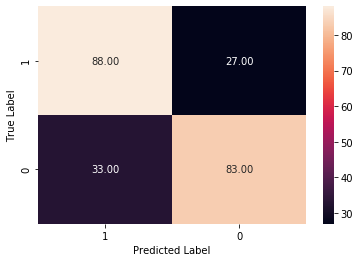


		*****Classification Report******
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       116
           1       0.73      0.77      0.75       115

    accuracy                           0.74       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.74      0.74      0.74       231

		********************************

*********
AUC Score: 0.82
*********


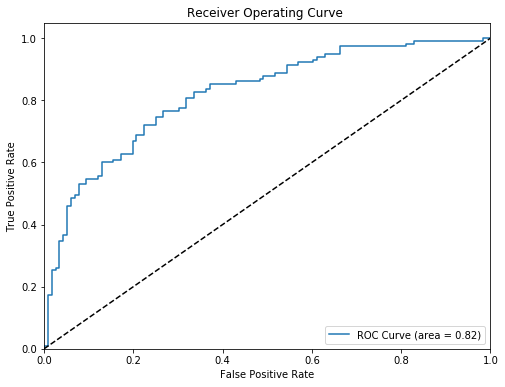

In [10]:
model_exec(logreg, X_scaled, y)

# Logistic Regression with Cross-Validation

	*****Confusion Metrix******


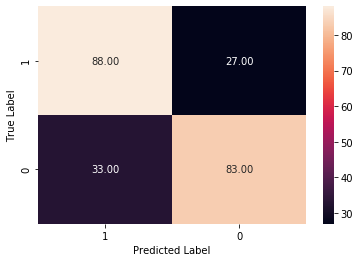


		*****Classification Report******
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       116
           1       0.73      0.77      0.75       115

    accuracy                           0.74       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.74      0.74      0.74       231

		********************************

*********
AUC Score: 0.81
*********


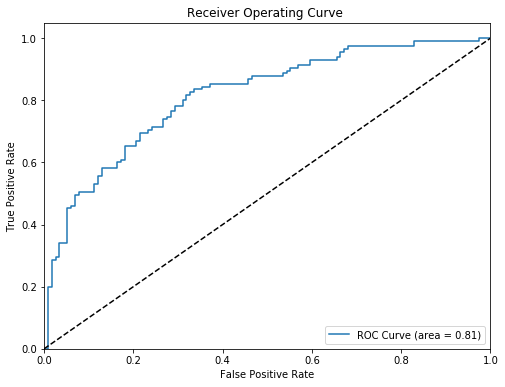

In [11]:
model_exec(logreg_cv, X_scaled, y)

# Decision Tree

In [0]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [2, None],
              "max_features": randint(1, 17),
              "min_samples_leaf": randint(1, 17),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

#### Without Cross-Validation

	*****Confusion Metrix******


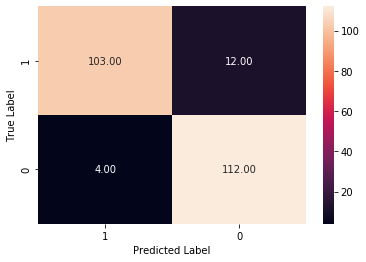


		*****Classification Report******
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       116
           1       0.96      0.90      0.93       115

    accuracy                           0.93       231
   macro avg       0.93      0.93      0.93       231
weighted avg       0.93      0.93      0.93       231

		********************************

*********
AUC Score: 0.93
*********


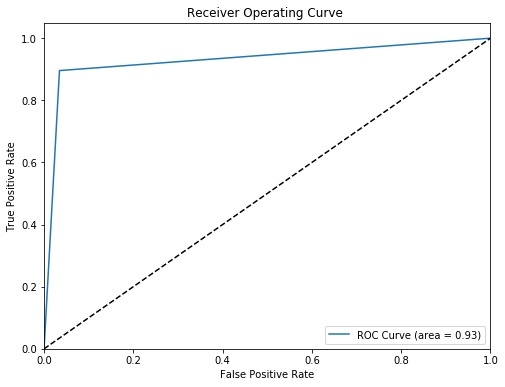

In [14]:
model_exec(tree, X_scaled, y)

#### With Cross-Validation

	*****Confusion Metrix******


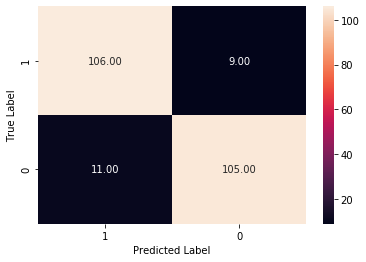


		*****Classification Report******
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       116
           1       0.91      0.92      0.91       115

    accuracy                           0.91       231
   macro avg       0.91      0.91      0.91       231
weighted avg       0.91      0.91      0.91       231

		********************************

*********
AUC Score: 0.94
*********


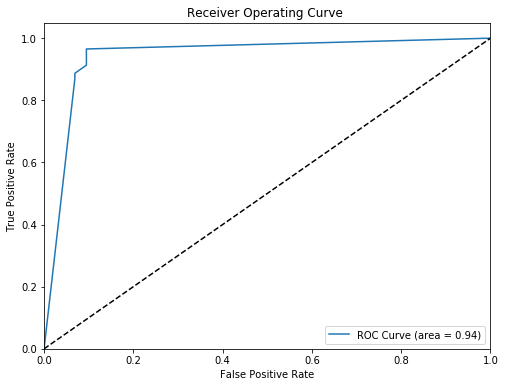

In [15]:
model_exec(tree_cv, X_scaled, y)

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [10, 15],
              "max_features": ['sqrt', 0.2],
              'n_estimators' : [10, 20],
              "criterion": ["gini", "entropy"]}

# Instantiate the RandomForestClassifier object: rfc
rfc = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object: rfc_cv
rfc_cv = RandomizedSearchCV(rfc, param_dist, cv=5)

#### Without Cross-Validation

	*****Confusion Metrix******


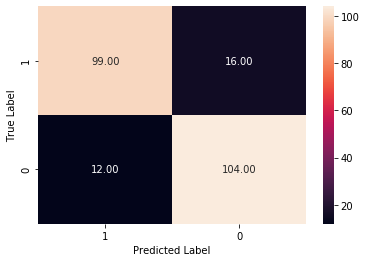


		*****Classification Report******
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       116
           1       0.89      0.86      0.88       115

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231

		********************************

*********
AUC Score: 0.95
*********


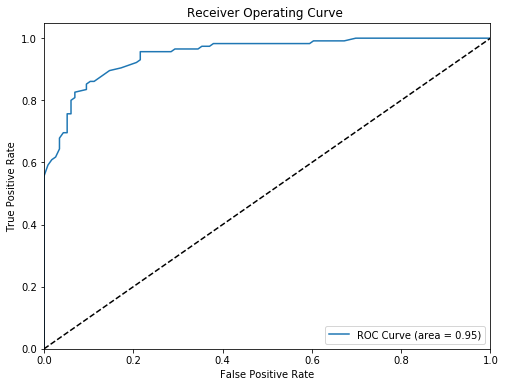

In [17]:
model_exec(rfc, X_scaled, y)

#### With Cross-Validation

	*****Confusion Metrix******


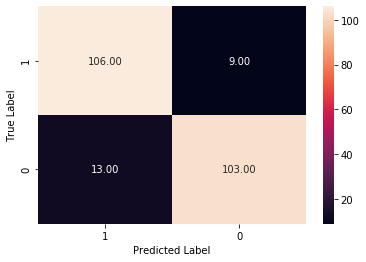


		*****Classification Report******
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       116
           1       0.89      0.92      0.91       115

    accuracy                           0.90       231
   macro avg       0.91      0.90      0.90       231
weighted avg       0.91      0.90      0.90       231

		********************************

*********
AUC Score: 0.96
*********


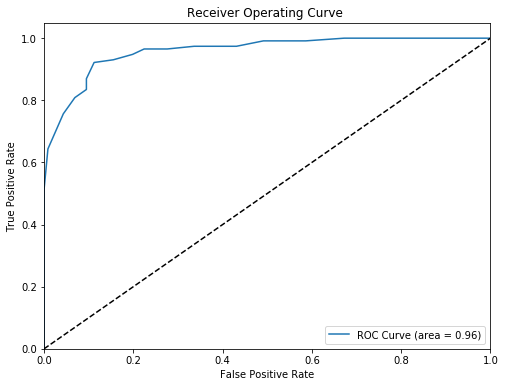

In [24]:
model_exec(rfc_cv, X_scaled, y)

# Support Vector Machine

In [0]:
from sklearn.svm import SVC

In [0]:
# Setup the hyperparameter grid
c_space = np.logspace(-2, 2, 17)
g_space = np.logspace(-2, 2, 17)
param_grid = {'C': c_space, 'gamma' : g_space}

# Instantiate C-Support Vector Classification: svc
svc = SVC(probability=True)

# Instantiate RandomizedSearchCV object: svc_cv
svc_cv = RandomizedSearchCV(svc, param_grid, cv = 5)

#### Without Cross-Validtion

	*****Confusion Metrix******


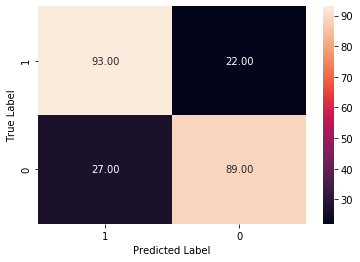


		*****Classification Report******
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       116
           1       0.78      0.81      0.79       115

    accuracy                           0.79       231
   macro avg       0.79      0.79      0.79       231
weighted avg       0.79      0.79      0.79       231

		********************************

*********
AUC Score: 0.88
*********


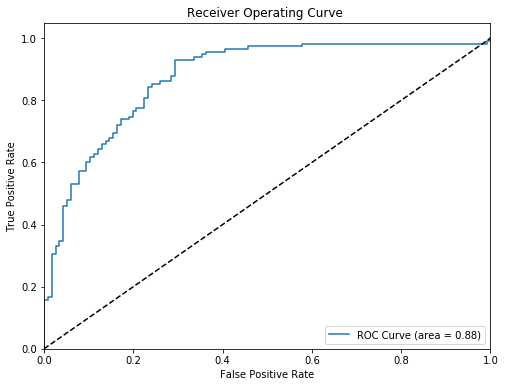

In [21]:
model_exec(svc, X_scaled, y)

#### With Cross-Validation

	*****Confusion Metrix******


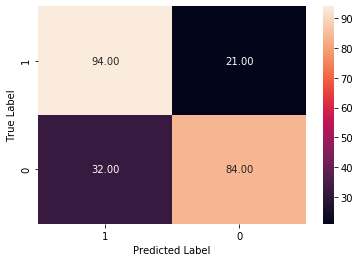


		*****Classification Report******
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       116
           1       0.75      0.82      0.78       115

    accuracy                           0.77       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.77      0.77      0.77       231

		********************************

*********
AUC Score: 0.85
*********


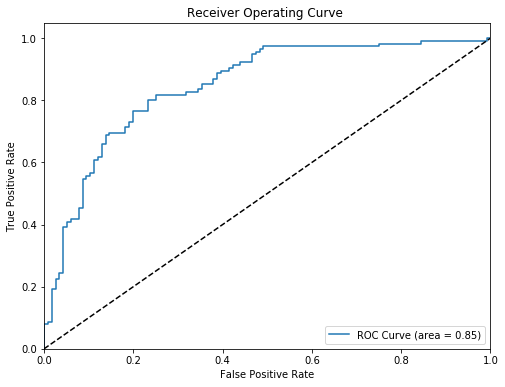

In [22]:
model_exec(svc_cv, X_scaled, y)